In [1]:
import pretty_midi
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# === 1. Visualizar archivos MIDI ===
def plot_piano_roll(midi_file):
    pm = pretty_midi.PrettyMIDI(midi_file)
    plt.figure(figsize=(12, 6))

    colors = ['red', 'blue', 'green', 'purple', 'orange']  # diferentes colores para cada pista

    for i, instrument in enumerate(pm.instruments):
        pitches = []
        start_times = []
        end_times = []

        for note in instrument.notes:
            pitches.append(note.pitch)
            start_times.append(note.start)
            end_times.append(note.end)

        color = colors[i % len(colors)]
        plt.hlines(pitches, start_times, end_times, label=f'Pista {i}: {instrument.name}', colors=color)

    plt.xlabel("Tiempo (s)")
    plt.ylabel("Pitch MIDI")
    plt.title("Piano Roll del MIDI")
    plt.legend()
    plt.show()

In [3]:
# === 2. Inspeccionar archivos MIDI ===
def inspect_midi(midi_file):
    pm = pretty_midi.PrettyMIDI(midi_file)
    print(f"Archivo: {midi_file}")
    for i, instrument in enumerate(pm.instruments):
        print(f"\nPista {i}: {instrument.name}, Notas: {len(instrument.notes)}")
        print("Primeras 10 notas:")
        for note in instrument.notes[:10]:
            print(f"  Pitch: {note.pitch}, Start: {note.start:.2f}, End: {note.end:.2f}")


In [4]:
# === 3. Visualizar archivos .pkl ===
def load_pkl(pkl_file):
    with open(pkl_file, "rb") as f:
        data = pickle.load(f)
    print("\nEstructura del archivo .pkl:", data.keys())

    print("\nPitch Data (Melodía):", data["pitch"].shape, "\n", data["pitch"])
    print("\nRhythm Data:", data["rhythm"].shape, "\n", data["rhythm"])
    print("\nChord Data:", data["chord"].shape, "\n", np.array(data["chord"].todense()))


    # Reconstruir una matriz piano roll a partir del vector de pitch
    num_pitches = 100 # o el valor de model_config["num_pitch"]
    time_steps = len(data["pitch"])
    piano_roll = np.zeros((num_pitches, time_steps))

    for t, p in enumerate(data["pitch"]):
        if p < num_pitches:  # ignorar silencios y símbolos especiales si los hay
            piano_roll[p, t] = 1

    plt.figure(figsize=(10, 5))
    plt.imshow(piano_roll, aspect="auto", cmap="gray_r", origin="lower")
    plt.title("Piano Roll de la Melodía (Desde .pkl)")
    plt.xlabel("Tiempo")
    plt.ylabel("Pitch")
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.imshow(np.array(data["chord"].todense()).T, aspect="auto", cmap="coolwarm", origin="lower")
    plt.title("Acordes (Desde .pkl)")
    plt.xlabel("Tiempo")
    plt.ylabel("Pitch")
    plt.colorbar()
    plt.show()

In [5]:
# === 4. Usar las funciones con tus archivos ===
# Especifica un archivo MIDI y un archivo .pkl para analizar
midi_file = "/home/cepatinog/smc-assignments/final_project/CMT-pytorch/data/midi_files/WjazzD/swapped/CharlieParker_DonnaLee_FINAL.mid/CharlieParker_DonnaLee_FINAL.mid"  # Cambia esto por un archivo real
#pkl_file = "data/pkl_files/instance_pkl_8bars_fpb16_48p_12keys/eval/CharlieParker_DonnaLee_FINAL.mid/CharlieParker_DonnaLee_FINAL.mid_00_+0_00.pkl"  # Cambia esto por un archivo real


Archivo: /home/cepatinog/smc-assignments/final_project/CMT-pytorch/data/midi_files/WjazzD/swapped/CharlieParker_DonnaLee_FINAL.mid/CharlieParker_DonnaLee_FINAL.mid

Pista 0: , Notas: 371
Primeras 10 notas:
  Pitch: 63, Start: 0.66, End: 0.80
  Pitch: 65, Start: 0.80, End: 1.06
  Pitch: 68, Start: 1.06, End: 1.24
  Pitch: 67, Start: 1.24, End: 1.33
  Pitch: 65, Start: 1.33, End: 1.46
  Pitch: 64, Start: 1.46, End: 1.59
  Pitch: 63, Start: 1.59, End: 1.73
  Pitch: 61, Start: 1.73, End: 1.99
  Pitch: 61, Start: 1.99, End: 2.06
  Pitch: 63, Start: 2.06, End: 2.26

Pista 1: , Notas: 236
Primeras 10 notas:
  Pitch: 68, Start: 2.12, End: 3.19
  Pitch: 72, Start: 2.12, End: 3.19
  Pitch: 75, Start: 2.12, End: 3.19
  Pitch: 65, Start: 3.19, End: 4.25
  Pitch: 69, Start: 3.19, End: 4.25
  Pitch: 72, Start: 3.19, End: 4.25
  Pitch: 75, Start: 3.19, End: 4.25
  Pitch: 70, Start: 4.25, End: 5.31
  Pitch: 74, Start: 4.25, End: 5.31
  Pitch: 77, Start: 4.25, End: 5.31


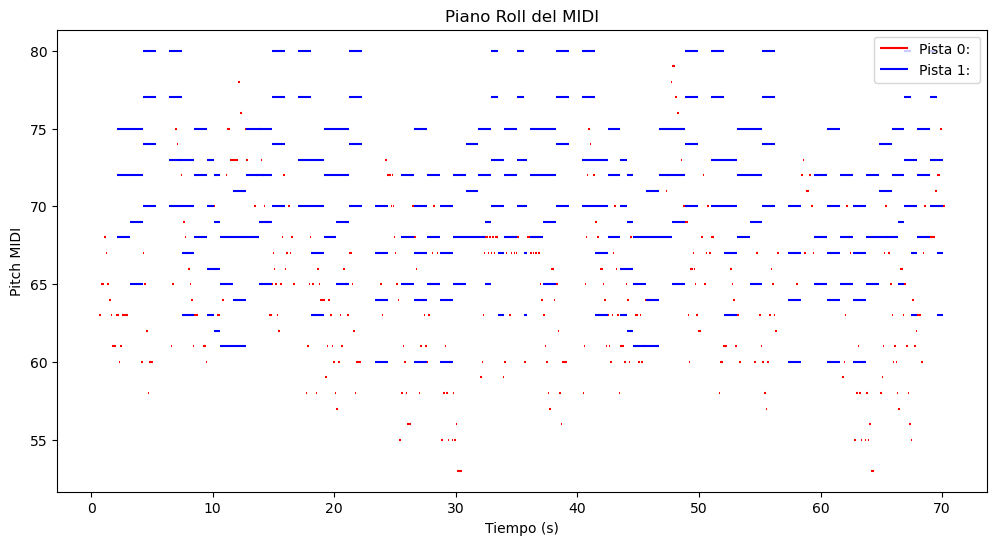

In [6]:
# Inspeccionar y visualizar el MIDI
inspect_midi(midi_file)
plot_piano_roll(midi_file)


In [ ]:
# Cargar y visualizar el .pkl
load_pkl(pkl_file)